## Problem Statement
### my reason to solve this problem is that I want to make builder's jobs a little easier by giving them a model from which they can precisely decide the area, locality and features of a house to build for maximum profit.

## Objective
###

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression
os.chdir(r'C:\Users\User\Downloads\linear regression ASSIGNMENT')
train_df=pd.read_csv('wk3_kc_house_train_data.csv')
test = pd.read_csv('wk3_kc_house_test_data.csv')
val = pd.read_csv('wk3_kc_house_valid_data.csv')

In [2]:
train_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
1,7237550310,20140512T000000,1230000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
2,9212900260,20140527T000000,468000.0,2,1.00,1160,6000,1.0,0,0,...,7,860,300,1942,0,98115,47.6900,-122.292,1330,6000
3,114101516,20140528T000000,310000.0,3,1.00,1430,19901,1.5,0,0,...,7,1430,0,1927,0,98028,47.7558,-122.229,1780,12697
4,6054650070,20141007T000000,400000.0,3,1.75,1370,9680,1.0,0,0,...,7,1370,0,1977,0,98074,47.6127,-122.045,1370,10208


In [3]:
train_df.shape # just to check number of rows and columsn 

(9761, 21)

In [4]:
train_df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [5]:
train_df.info() # to check the data types of each columns 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9761 entries, 0 to 9760
Data columns (total 21 columns):
id               9761 non-null int64
date             9761 non-null object
price            9761 non-null float64
bedrooms         9761 non-null int64
bathrooms        9761 non-null float64
sqft_living      9761 non-null int64
sqft_lot         9761 non-null int64
floors           9761 non-null float64
waterfront       9761 non-null int64
view             9761 non-null int64
condition        9761 non-null int64
grade            9761 non-null int64
sqft_above       9761 non-null int64
sqft_basement    9761 non-null int64
yr_built         9761 non-null int64
yr_renovated     9761 non-null int64
zipcode          9761 non-null int64
lat              9761 non-null float64
long             9761 non-null float64
sqft_living15    9761 non-null int64
sqft_lot15       9761 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 1.6+ MB


In [6]:
train_df.isnull().sum() # to check if there are any null values in any column

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

### seperating numeric features from the data

In [7]:
numeric_f = train_df.select_dtypes(include=[np.number]) # to seperate the numercal variables with data types float int 
numeric_f.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
1,7237550310,1230000.0,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
2,9212900260,468000.0,2,1.00,1160,6000,1.0,0,0,4,7,860,300,1942,0,98115,47.6900,-122.292,1330,6000
3,114101516,310000.0,3,1.00,1430,19901,1.5,0,0,4,7,1430,0,1927,0,98028,47.7558,-122.229,1780,12697
4,6054650070,400000.0,3,1.75,1370,9680,1.0,0,0,4,7,1370,0,1977,0,98074,47.6127,-122.045,1370,10208


### seperating object type features 

In [8]:
obj_f = train_df.select_dtypes(include=[np.object])
obj_f.head()

,date
0,20141209T000000
1,20140512T000000
2,20140527T000000
3,20140528T000000
4,20141007T000000


### finding corelation between

In [9]:
corre = obj_f.corr()

In [10]:
corr = numeric_f.corr()

### plotting heatmap

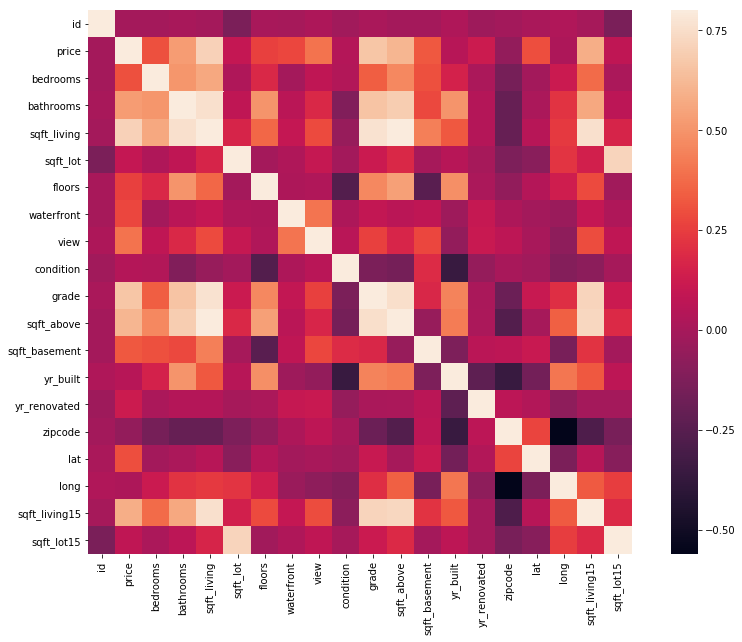

In [11]:
f , ax = plt.subplots(figsize = (14,10))
sns.heatmap(corr,square = True, vmax=0.8)

### taking 15 features with max correlation and pltoing a detailed heatmap

Index(['price', 'sqft_living', 'grade', 'sqft_above', 'sqft_living15',
       'bathrooms', 'view', 'sqft_basement', 'bedrooms', 'lat', 'waterfront',
       'floors', 'yr_renovated', 'sqft_lot', 'sqft_lot15'],
      dtype='object')


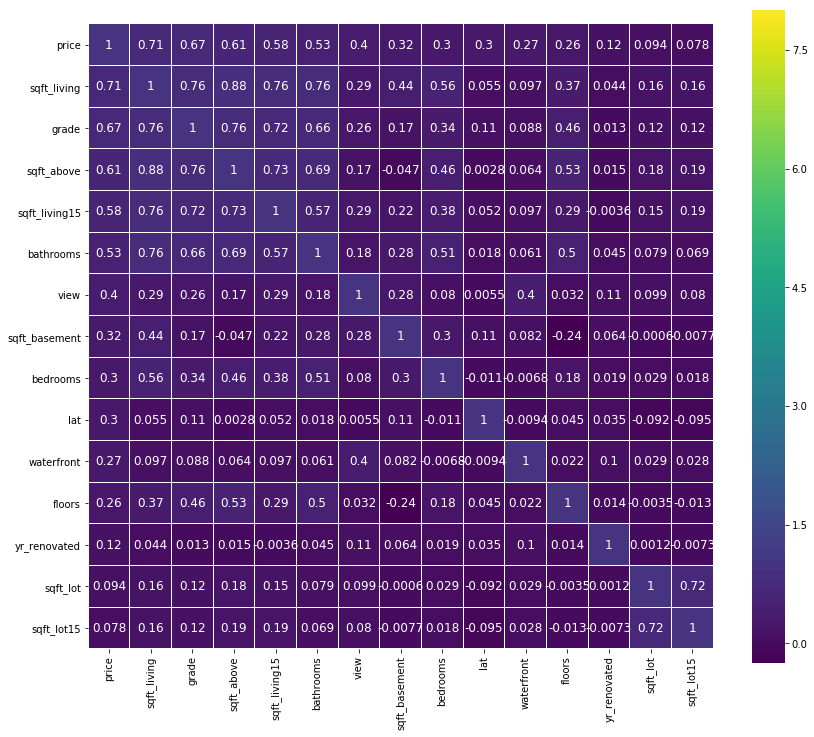

In [12]:
k=15
cols = corr.nlargest(k,'price')['price'].index    # finding 15 largest correlation variables and making them and the price column as index
print(cols)
cm = np.corrcoef(train_df[cols].values.T)
f , ax = plt.subplots(figsize = (14,12))
sns.heatmap(cm, vmax=8, linewidths=0.01, square=True,annot=True,cmap='viridis',
            linecolor='white',xticklabels = cols.values, annot_kws = {'size':12},yticklabels = cols.values)

### Ploting Boxplots for outliers detection

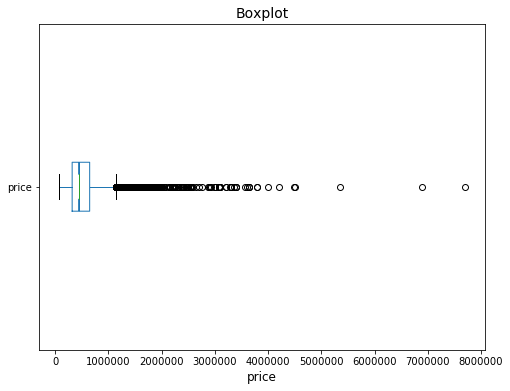

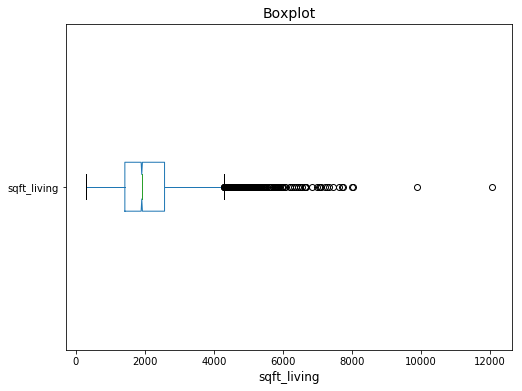

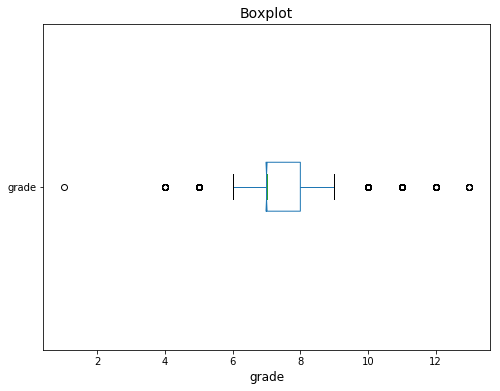

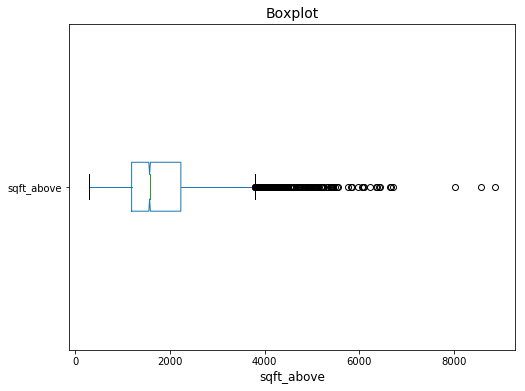

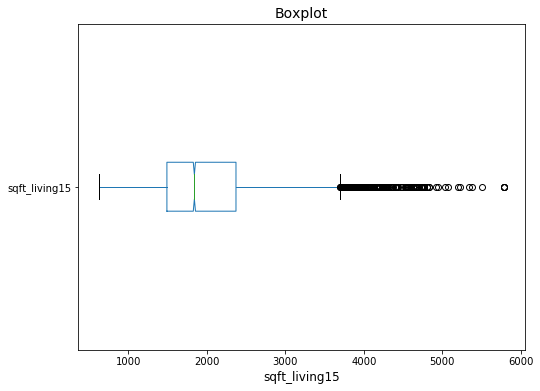

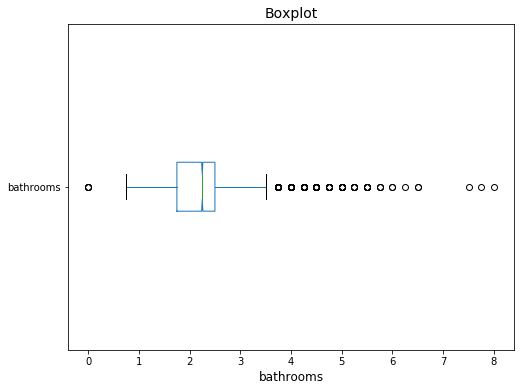

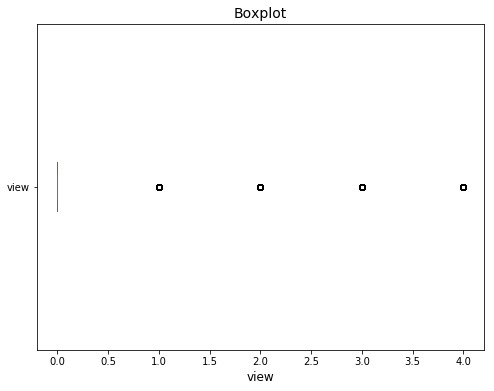

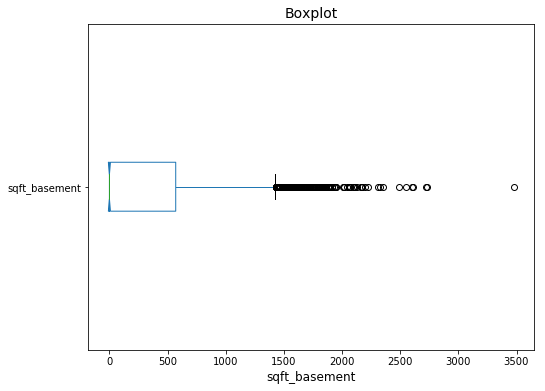

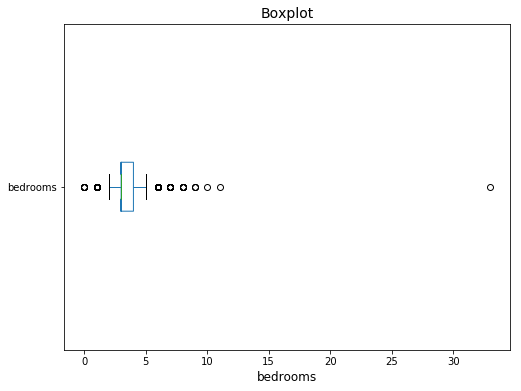

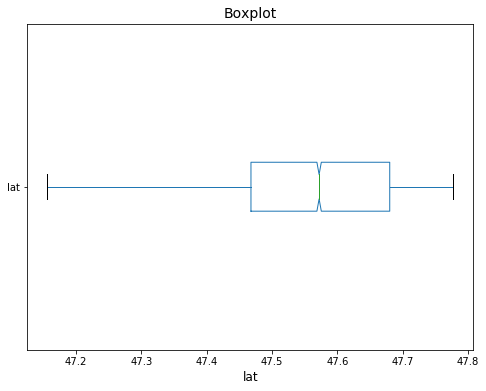

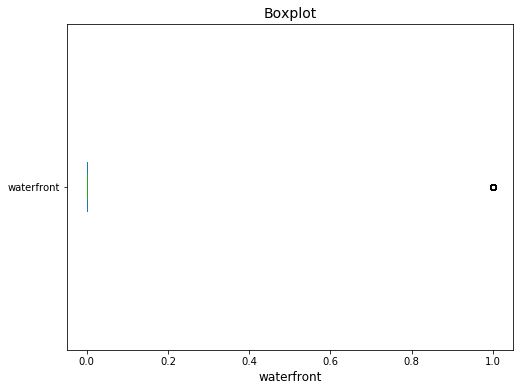

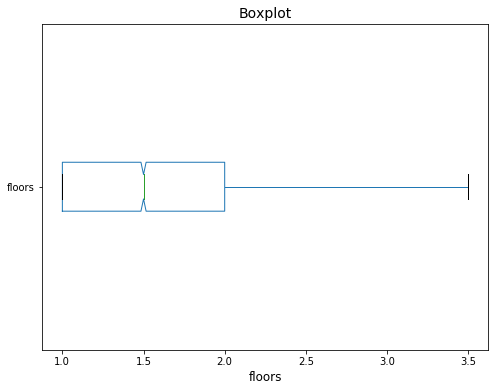

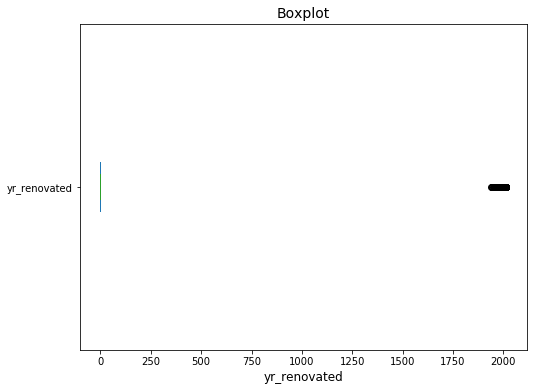

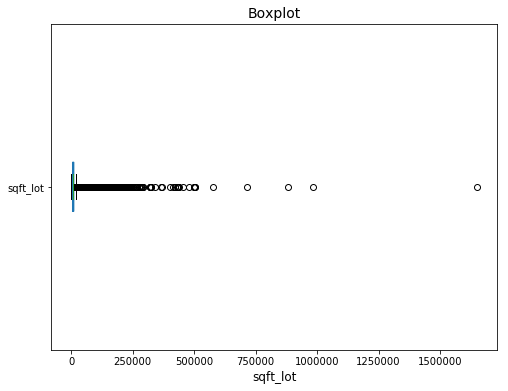

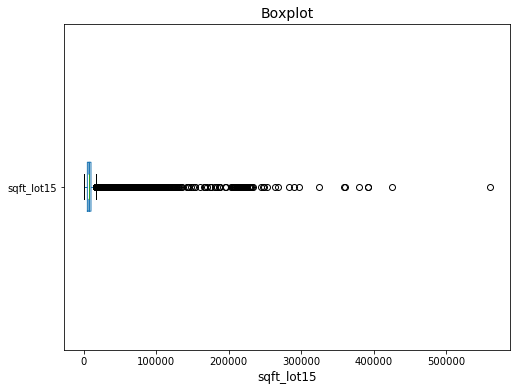

In [13]:
for feature in cols:
    train_df.boxplot(column=feature , notch= True,   #TO get the notch( when the quartiles overlap) 
                grid= False,
                figsize=(8,6),
                vert= False) #to Plot a horizontal box plot

    plt.xlabel(feature, fontsize=12)
    plt.title("Boxplot", fontsize=14)

    plt.show()

In [14]:
#getting the index value of the value which is greated than 20 in bedrooms as it is clearly wrong
train_df.index[train_df['bedrooms'] > 20].tolist()

[7204]

In [15]:
train_df.index[train_df['bedrooms']== 0].tolist()

[2228, 3177, 4472, 4507, 8338, 8840]

In [16]:
#dropping the outlier value using index
e = [2228, 3177, 4472, 4507, 8338, 8840, 7204]
for n in e:
    train_df = train_df.drop([n])
    


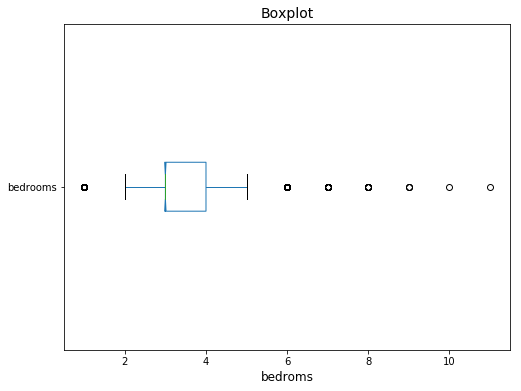

In [17]:
#plotting the box plot again just to check if the value was dropped
train_df.boxplot(column=['bedrooms'] , notch= True,   #TO get the notch( when the quartiles overlap) 
                grid= False,
                figsize=(8,6),
                vert= False) #to Plot a horizontal box plot

plt.xlabel('bedroms', fontsize=12)
plt.title("Boxplot", fontsize=14)

plt.show()

### features which has year in it

In [18]:
year_feature = [feature for feature in numeric_f if 'yr' in feature]  #this stores all the year features in the vriable

year_feature

['yr_built', 'yr_renovated']

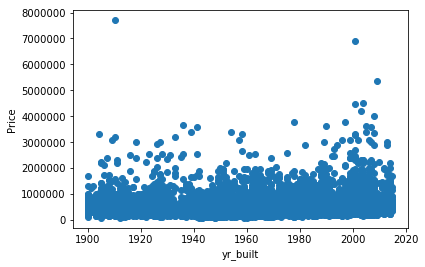

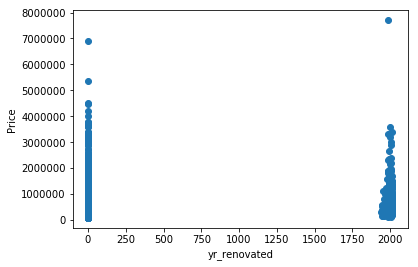

In [19]:
## plotting year features with price values 

for feature in year_feature:

        plt.scatter(train_df[feature],train_df['price'])
        plt.xlabel(feature)
        plt.ylabel('Price')
        plt.show()

Can't find any relation or trend bwtween year features and price 

### Discrete features

In [20]:
# this takking the features which has less than 25 unique values and removing the year and ID columns from the data

discrete_feature=[feature for feature in numeric_f if len(train_df[feature].unique())<25 and feature not in year_feature+['id']]
print('Discrete Variables Count:', len(discrete_feature))

Discrete Variables Count: 6


In [21]:
discrete_feature

['bedrooms', 'floors', 'waterfront', 'view', 'condition', 'grade']

### Creating dummy variables of zipcode

In [22]:
len(train_df['zipcode'].unique())
#train_df['zipcode'].value_counts()

70

In [23]:
# making copy of the OG data as we are droping date and creating dummy for zipcode
train_zip = train_df.copy()
val_zip = val.copy()
test_zip = test.copy()

In [24]:
# dropping date columns from all the data sets
train_zip = train_zip.drop(['date'], axis=1)
val_zip = val_zip.drop(['date'], axis=1)
test_zip = test_zip.drop(['date'], axis=1)
test_zip.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [25]:
# converting zipcode into string variable
convert_dict = {'zipcode': str} 
train_zip = train_zip.astype(convert_dict) 
val_zip = val_zip.astype(convert_dict) 
test_zip = test_zip.astype(convert_dict) 

In [26]:
#creating dummy vaiables for zipc0de
train_zip = pd.get_dummies(train_zip,drop_first=True)
val_zip = pd.get_dummies(val_zip,drop_first=True)
test_zip = pd.get_dummies(test_zip,drop_first=True)

In [27]:
s= pd.get_dummies(test_zip,drop_first=True)
s.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'zipcode_98002', 'zipcode_98003',
       'zipcode_98004', 'zipcode_98005', 'zipcode_98006', 'zipcode_98007',
       'zipcode_98008', 'zipcode_98010', 'zipcode_98011', 'zipcode_98014',
       'zipcode_98019', 'zipcode_98022', 'zipcode_98023', 'zipcode_98024',
       'zipcode_98027', 'zipcode_98028', 'zipcode_98029', 'zipcode_98030',
       'zipcode_98031', 'zipcode_98032', 'zipcode_98033', 'zipcode_98034',
       'zipcode_98038', 'zipcode_98039', 'zipcode_98040', 'zipcode_98042',
       'zipcode_98045', 'zipcode_98052', 'zipcode_98053', 'zipcode_98055',
       'zipcode_98056', 'zipcode_98058', 'zipcode_98059', 'zipcode_98065',
       'zipcode_98070', 'zipcode_98072', 'zipcode_98074', 'zipcode_98075',
       'zipcode_98077', 'zipcode_9809

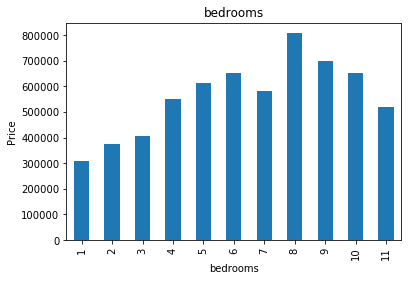

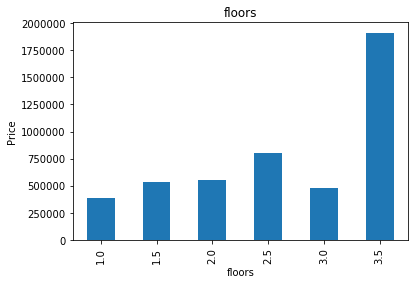

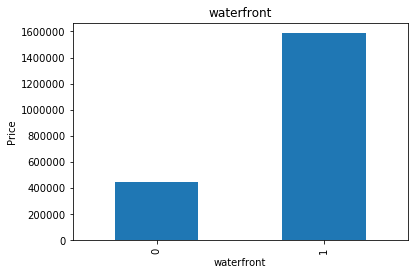

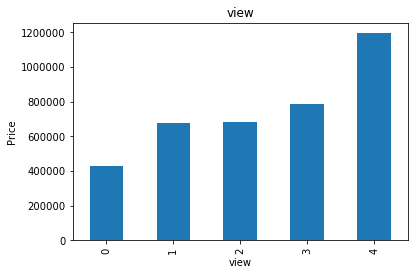

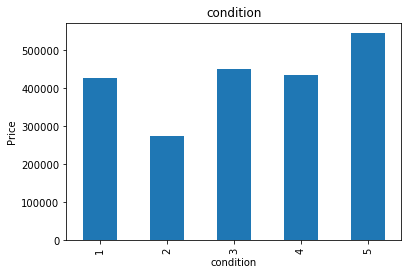

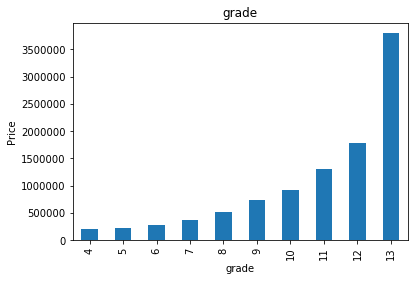

In [28]:
#realtionship between them and SalePice

for feature in discrete_feature:          
    data=train_df.copy()
    data.groupby(feature)['price'].median().plot.bar() # plotting a bar plot for each discerete feature's unique features in X 
                                                       #and ploting their median values wrt price in y
    plt.xlabel(feature)
    plt.ylabel('Price')
    plt.title(feature)
    plt.show()

In [29]:
data['price'].median()

450000.0

### continous feature 

In [30]:
continuous_feature=[feature for feature in numeric_f if feature not in discrete_feature+year_feature+['id']]
print(len(continuous_feature))

11


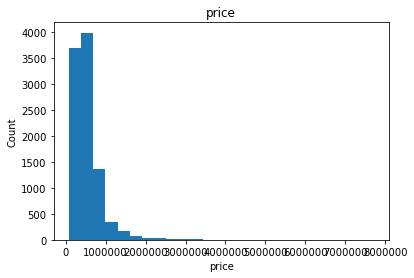

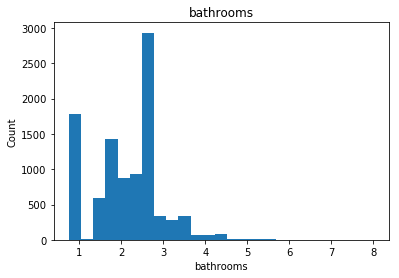

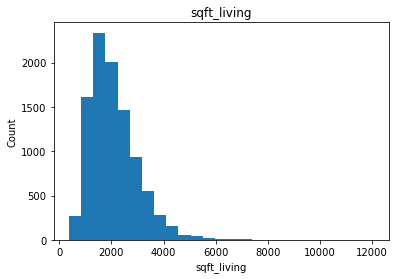

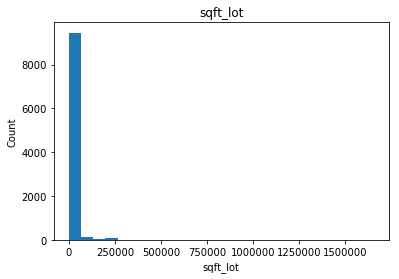

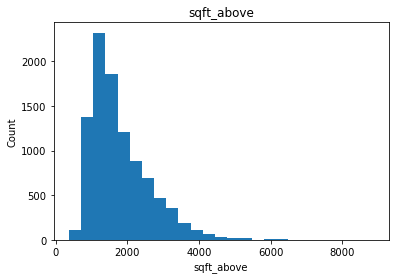

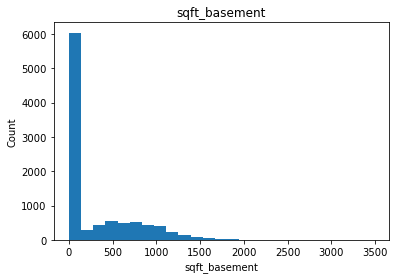

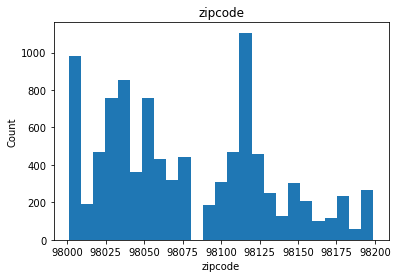

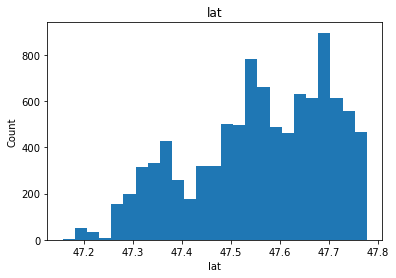

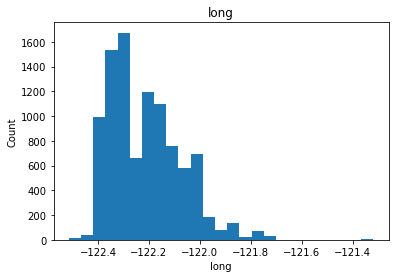

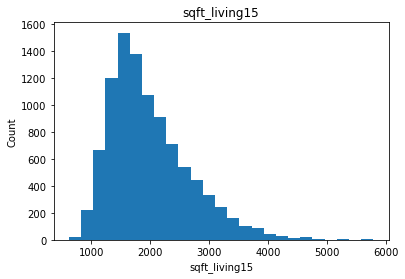

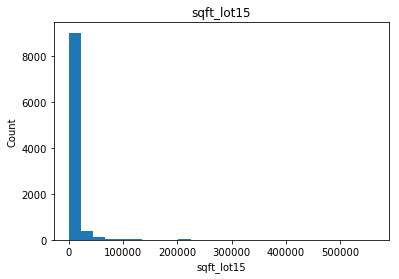

In [31]:
# plottting continous feature's histograms

for feature in continuous_feature:
    data=train_df.copy()
    plt.hist(data[feature], bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

In [32]:
a=np.log(train_df['price'])
b=np.log(train_df['sqft_living'])


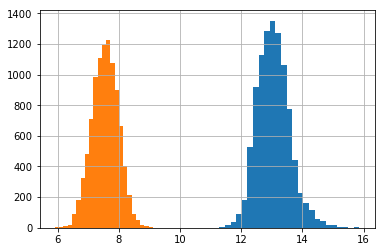

In [33]:
a.hist(bins=25)
b.hist(bins=25)

### dioing log normalization by skipping 0 values 

In [34]:
e = train_df['bathrooms'].copy()
np.seterr(divide = 'ignore')
e=np.where(train_df['bathrooms']>0, np.log(train_df['bathrooms']), 0) # if the bathroom value is > than 0 do log or else it is zero 

In [35]:
f= pd.DataFrame(e)  # after using np.where it turns the data into np array so we have to convert it back to DF

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000012DB5400>]],
      dtype=object)

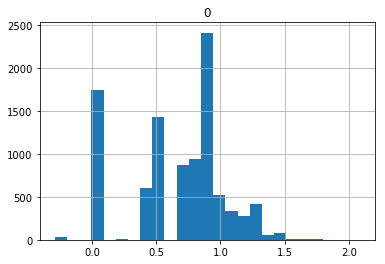

In [36]:
f.hist(bins=25)  # just to look at the distribution after the log normalization


it didn't change to normal distirbution even after this

### MODEL 1  (using the columns with highest correlation to price)


In [37]:
xtrain = train_zip[['sqft_living', 'grade', 'sqft_above', 'sqft_living15',
       'bathrooms', 'view', 'sqft_basement', 'bedrooms', 'lat', 'waterfront',
       'floors', 'yr_renovated','sqft_lot', 'sqft_lot15', 'zipcode_98002', 'zipcode_98003',
       'zipcode_98004', 'zipcode_98005', 'zipcode_98006', 'zipcode_98007',
       'zipcode_98008', 'zipcode_98010', 'zipcode_98011', 'zipcode_98014',
       'zipcode_98019', 'zipcode_98022', 'zipcode_98023', 'zipcode_98024',
       'zipcode_98027', 'zipcode_98028', 'zipcode_98029', 'zipcode_98030',
       'zipcode_98031', 'zipcode_98032', 'zipcode_98033', 'zipcode_98034',
       'zipcode_98038', 'zipcode_98039', 'zipcode_98040', 'zipcode_98042',
       'zipcode_98045', 'zipcode_98052', 'zipcode_98053', 'zipcode_98055',
       'zipcode_98056', 'zipcode_98058', 'zipcode_98059', 'zipcode_98065',
       'zipcode_98070', 'zipcode_98072', 'zipcode_98074', 'zipcode_98075',
       'zipcode_98077', 'zipcode_98092', 'zipcode_98102', 'zipcode_98103',
       'zipcode_98105', 'zipcode_98106', 'zipcode_98107', 'zipcode_98108',
       'zipcode_98109', 'zipcode_98112', 'zipcode_98115', 'zipcode_98116',
       'zipcode_98117', 'zipcode_98118', 'zipcode_98119', 'zipcode_98122',
       'zipcode_98125', 'zipcode_98126', 'zipcode_98133', 'zipcode_98136',
       'zipcode_98144', 'zipcode_98146', 'zipcode_98148', 'zipcode_98155',
       'zipcode_98166', 'zipcode_98168', 'zipcode_98177', 'zipcode_98178',
       'zipcode_98188', 'zipcode_98198', 'zipcode_98199']]
ytrain = train_zip[['price']]
xtest = val_zip[['sqft_living', 'grade', 'sqft_above', 'sqft_living15',
       'bathrooms', 'view', 'sqft_basement', 'bedrooms', 'lat', 'waterfront',
       'floors', 'yr_renovated', 'sqft_lot', 'sqft_lot15', 'zipcode_98002', 'zipcode_98003',
       'zipcode_98004', 'zipcode_98005', 'zipcode_98006', 'zipcode_98007',
       'zipcode_98008', 'zipcode_98010', 'zipcode_98011', 'zipcode_98014',
       'zipcode_98019', 'zipcode_98022', 'zipcode_98023', 'zipcode_98024',
       'zipcode_98027', 'zipcode_98028', 'zipcode_98029', 'zipcode_98030',
       'zipcode_98031', 'zipcode_98032', 'zipcode_98033', 'zipcode_98034',
       'zipcode_98038', 'zipcode_98039', 'zipcode_98040', 'zipcode_98042',
       'zipcode_98045', 'zipcode_98052', 'zipcode_98053', 'zipcode_98055',
       'zipcode_98056', 'zipcode_98058', 'zipcode_98059', 'zipcode_98065',
       'zipcode_98070', 'zipcode_98072', 'zipcode_98074', 'zipcode_98075',
       'zipcode_98077', 'zipcode_98092', 'zipcode_98102', 'zipcode_98103',
       'zipcode_98105', 'zipcode_98106', 'zipcode_98107', 'zipcode_98108',
       'zipcode_98109', 'zipcode_98112', 'zipcode_98115', 'zipcode_98116',
       'zipcode_98117', 'zipcode_98118', 'zipcode_98119', 'zipcode_98122',
       'zipcode_98125', 'zipcode_98126', 'zipcode_98133', 'zipcode_98136',
       'zipcode_98144', 'zipcode_98146', 'zipcode_98148', 'zipcode_98155',
       'zipcode_98166', 'zipcode_98168', 'zipcode_98177', 'zipcode_98178',
       'zipcode_98188', 'zipcode_98198', 'zipcode_98199']]
ytest = val_zip[['price']]

In [38]:
linearRegressor = LinearRegression()  # making an object of the linear regression model

linearRegressor.fit(xtrain, ytrain)   # fitting the training data 


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [39]:
ypred = linearRegressor.predict(xtest) # using algo to predict the value for test data

In [40]:
np.sqrt(np.mean((np.array(ytest)-ypred)**2)) #RMSE

158950.2910276

In [41]:
from sklearn.metrics import r2_score       # calculating r2 value to know the accuracy of the model
r2_score(ytest, ypred, sample_weight=None, multioutput='uniform_average')

0.8008370729137206

### MODEL 2

In [42]:
# REMOVING--- sqft_living15, bathrooms  ,  'sqft_lot15' , date,  'yr_renovated', zipcode, sqft_above

xtrain = train_zip[['sqft_living', 'grade', 'view', 'sqft_basement', 'bedrooms', 'lat', 'waterfront',
       'floors', 'sqft_lot', 'zipcode_98002', 'zipcode_98003',
       'zipcode_98004', 'zipcode_98005', 'zipcode_98006', 'zipcode_98007',
       'zipcode_98008', 'zipcode_98010', 'zipcode_98011', 'zipcode_98014',
       'zipcode_98019', 'zipcode_98022', 'zipcode_98023', 'zipcode_98024',
       'zipcode_98027', 'zipcode_98028', 'zipcode_98029', 'zipcode_98030',
       'zipcode_98031', 'zipcode_98032', 'zipcode_98033', 'zipcode_98034',
       'zipcode_98038', 'zipcode_98039', 'zipcode_98040', 'zipcode_98042',
       'zipcode_98045', 'zipcode_98052', 'zipcode_98053', 'zipcode_98055',
       'zipcode_98056', 'zipcode_98058', 'zipcode_98059', 'zipcode_98065',
       'zipcode_98070', 'zipcode_98072', 'zipcode_98074', 'zipcode_98075',
       'zipcode_98077', 'zipcode_98092', 'zipcode_98102', 'zipcode_98103',
       'zipcode_98105', 'zipcode_98106', 'zipcode_98107', 'zipcode_98108',
       'zipcode_98109', 'zipcode_98112', 'zipcode_98115', 'zipcode_98116',
       'zipcode_98117', 'zipcode_98118', 'zipcode_98119', 'zipcode_98122',
       'zipcode_98125', 'zipcode_98126', 'zipcode_98133', 'zipcode_98136',
       'zipcode_98144', 'zipcode_98146', 'zipcode_98148', 'zipcode_98155',
       'zipcode_98166', 'zipcode_98168', 'zipcode_98177', 'zipcode_98178',
       'zipcode_98188', 'zipcode_98198', 'zipcode_98199']]
ytrain = train_zip[['price']]
xtest = val_zip[['sqft_living', 'grade',
        'view', 'sqft_basement', 'bedrooms', 'lat', 'waterfront',
       'floors',  'sqft_lot', 'zipcode_98002', 'zipcode_98003',
       'zipcode_98004', 'zipcode_98005', 'zipcode_98006', 'zipcode_98007',
       'zipcode_98008', 'zipcode_98010', 'zipcode_98011', 'zipcode_98014',
       'zipcode_98019', 'zipcode_98022', 'zipcode_98023', 'zipcode_98024',
       'zipcode_98027', 'zipcode_98028', 'zipcode_98029', 'zipcode_98030',
       'zipcode_98031', 'zipcode_98032', 'zipcode_98033', 'zipcode_98034',
       'zipcode_98038', 'zipcode_98039', 'zipcode_98040', 'zipcode_98042',
       'zipcode_98045', 'zipcode_98052', 'zipcode_98053', 'zipcode_98055',
       'zipcode_98056', 'zipcode_98058', 'zipcode_98059', 'zipcode_98065',
       'zipcode_98070', 'zipcode_98072', 'zipcode_98074', 'zipcode_98075',
       'zipcode_98077', 'zipcode_98092', 'zipcode_98102', 'zipcode_98103',
       'zipcode_98105', 'zipcode_98106', 'zipcode_98107', 'zipcode_98108',
       'zipcode_98109', 'zipcode_98112', 'zipcode_98115', 'zipcode_98116',
       'zipcode_98117', 'zipcode_98118', 'zipcode_98119', 'zipcode_98122',
       'zipcode_98125', 'zipcode_98126', 'zipcode_98133', 'zipcode_98136',
       'zipcode_98144', 'zipcode_98146', 'zipcode_98148', 'zipcode_98155',
       'zipcode_98166', 'zipcode_98168', 'zipcode_98177', 'zipcode_98178',
       'zipcode_98188', 'zipcode_98198', 'zipcode_98199']]
ytest = val_zip[['price']]

In [43]:
linearRegressor = LinearRegression()  # making an object of the linear regression model

linearRegressor.fit(xtrain, ytrain)   # fitting the training data 


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [44]:
ypred = linearRegressor.predict(xtest) # using algo to predict the value for test data

In [45]:
np.sqrt(np.mean((np.array(ytest)-ypred)**2)) #RMSE

159460.44574649402

In [46]:
from sklearn.metrics import r2_score       # calculating r2 value to know the accuracy of the model
r2_score(ytest, ypred, sample_weight=None, multioutput='uniform_average')

0.799556585076983

### MODEL 3 ( after log normalization of continous features )

In [71]:
data = train_zip.copy()

this is for training data

In [72]:
# we had some 11 continous features but these were the one's with highest correlation

l = ['price',
 'sqft_living',
 'sqft_lot',
 'sqft_above',
 'sqft_basement',
 'sqft_living15',
 'sqft_lot15']
for f in l:
    np.seterr(divide = 'ignore')
    data[f]=pd.DataFrame(np.where(data[f]>0, np.log(data[f]), 0))

this is for test and validation data

In [73]:
data_test = test_zip.copy()
data_val = val_zip.copy()
for f in l:
    np.seterr(divide = 'ignore')
    data_test[f]=pd.DataFrame(np.where(data_test[f]>0, np.log(data_test[f]), 0))
    data_val[f]=pd.DataFrame(np.where(data_val[f]>0, np.log(data_val[f]), 0))

    

In [74]:
data.isnull().sum()

id               0
price            7
bedrooms         0
bathrooms        0
sqft_living      7
sqft_lot         7
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       7
sqft_basement    7
yr_built         0
yr_renovated     0
lat              0
long             0
sqft_living15    7
sqft_lot15       7
zipcode_98002    0
zipcode_98003    0
zipcode_98004    0
zipcode_98005    0
zipcode_98006    0
zipcode_98007    0
zipcode_98008    0
zipcode_98010    0
zipcode_98011    0
zipcode_98014    0
zipcode_98019    0
                ..
zipcode_98092    0
zipcode_98102    0
zipcode_98103    0
zipcode_98105    0
zipcode_98106    0
zipcode_98107    0
zipcode_98108    0
zipcode_98109    0
zipcode_98112    0
zipcode_98115    0
zipcode_98116    0
zipcode_98117    0
zipcode_98118    0
zipcode_98119    0
zipcode_98122    0
zipcode_98125    0
zipcode_98126    0
zipcode_98133    0
zipcode_98136    0
zipcode_98144    0
zipcode_98146    0
zipcode_9814

In [75]:
s = []
for f in l:
    a= data[data[f].isnull()].index.tolist()
    s.append(a)
s

[[9754, 9755, 9756, 9757, 9758, 9759, 9760],
 [9754, 9755, 9756, 9757, 9758, 9759, 9760],
 [9754, 9755, 9756, 9757, 9758, 9759, 9760],
 [9754, 9755, 9756, 9757, 9758, 9759, 9760],
 [9754, 9755, 9756, 9757, 9758, 9759, 9760],
 [9754, 9755, 9756, 9757, 9758, 9759, 9760],
 [9754, 9755, 9756, 9757, 9758, 9759, 9760]]

In [76]:
data = data.drop([9754, 9755, 9756, 9757, 9758, 9759, 9760])

In [82]:
x_train = data[['bedrooms', 'bathrooms', 'sqft_living',                        #removed 'yr_built', 'yr_renovated',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement',
        'sqft_living15', 'sqft_lot15', 'zipcode_98002', 'zipcode_98003',
       'zipcode_98004', 'zipcode_98005', 'zipcode_98006', 'zipcode_98007',
       'zipcode_98008', 'zipcode_98010', 'zipcode_98011', 'zipcode_98014',
       'zipcode_98019', 'zipcode_98022', 'zipcode_98023', 'zipcode_98024',
       'zipcode_98027', 'zipcode_98028', 'zipcode_98029', 'zipcode_98030',
       'zipcode_98031', 'zipcode_98032', 'zipcode_98033', 'zipcode_98034',
       'zipcode_98038', 'zipcode_98039', 'zipcode_98040', 'zipcode_98042',
       'zipcode_98045', 'zipcode_98052', 'zipcode_98053', 'zipcode_98055',
       'zipcode_98056', 'zipcode_98058', 'zipcode_98059', 'zipcode_98065',
       'zipcode_98070', 'zipcode_98072', 'zipcode_98074', 'zipcode_98075',
       'zipcode_98077', 'zipcode_98092', 'zipcode_98102', 'zipcode_98103',
       'zipcode_98105', 'zipcode_98106', 'zipcode_98107', 'zipcode_98108',
       'zipcode_98109', 'zipcode_98112', 'zipcode_98115', 'zipcode_98116',
       'zipcode_98117', 'zipcode_98118', 'zipcode_98119', 'zipcode_98122',
       'zipcode_98125', 'zipcode_98126', 'zipcode_98133', 'zipcode_98136',
       'zipcode_98144', 'zipcode_98146', 'zipcode_98148', 'zipcode_98155',
       'zipcode_98166', 'zipcode_98168', 'zipcode_98177', 'zipcode_98178',
       'zipcode_98188', 'zipcode_98198', 'zipcode_98199']]
y_train = data[['price']]
 
x_test = data_val[['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 
       'sqft_living15', 'sqft_lot15', 'zipcode_98002', 'zipcode_98003',
       'zipcode_98004', 'zipcode_98005', 'zipcode_98006', 'zipcode_98007',
       'zipcode_98008', 'zipcode_98010', 'zipcode_98011', 'zipcode_98014',
       'zipcode_98019', 'zipcode_98022', 'zipcode_98023', 'zipcode_98024',
       'zipcode_98027', 'zipcode_98028', 'zipcode_98029', 'zipcode_98030',
       'zipcode_98031', 'zipcode_98032', 'zipcode_98033', 'zipcode_98034',
       'zipcode_98038', 'zipcode_98039', 'zipcode_98040', 'zipcode_98042',
       'zipcode_98045', 'zipcode_98052', 'zipcode_98053', 'zipcode_98055',
       'zipcode_98056', 'zipcode_98058', 'zipcode_98059', 'zipcode_98065',
       'zipcode_98070', 'zipcode_98072', 'zipcode_98074', 'zipcode_98075',
       'zipcode_98077', 'zipcode_98092', 'zipcode_98102', 'zipcode_98103',
       'zipcode_98105', 'zipcode_98106', 'zipcode_98107', 'zipcode_98108',
       'zipcode_98109', 'zipcode_98112', 'zipcode_98115', 'zipcode_98116',
       'zipcode_98117', 'zipcode_98118', 'zipcode_98119', 'zipcode_98122',
       'zipcode_98125', 'zipcode_98126', 'zipcode_98133', 'zipcode_98136',
       'zipcode_98144', 'zipcode_98146', 'zipcode_98148', 'zipcode_98155',
       'zipcode_98166', 'zipcode_98168', 'zipcode_98177', 'zipcode_98178',
       'zipcode_98188', 'zipcode_98198', 'zipcode_98199']]
y_test = data_val[['price']]

In [83]:
linearRegressor = LinearRegression()  # making an object of the linear regression model

linearRegressor.fit(x_train, y_train)   # fitting the training data 


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [84]:
y_pred = linearRegressor.predict(x_test) # using algo to predict the value for test data

In [85]:
np.sqrt(np.mean((np.array(y_test)-y_pred)**2)) #RMSE

0.3142573081256827

In [86]:
from sklearn.metrics import r2_score       # calculating r2 value to know the accuracy of the model
r2_score(y_test, y_pred, sample_weight=None, multioutput='uniform_average')

0.6362605839708435

### MODEL 4 (using regression tree)

In [60]:
#for fitting regression tree
from sklearn.tree import DecisionTreeRegressor

In [61]:
xtrain = train_zip[['sqft_living', 'grade', 'sqft_above', 'sqft_living15',
       'bathrooms', 'view', 'sqft_basement', 'bedrooms', 'lat', 'waterfront',
       'floors', 'yr_renovated', 'sqft_lot', 'sqft_lot15', 'zipcode_98002', 'zipcode_98003',
       'zipcode_98004', 'zipcode_98005', 'zipcode_98006', 'zipcode_98007',
       'zipcode_98008', 'zipcode_98010', 'zipcode_98011', 'zipcode_98014',
       'zipcode_98019', 'zipcode_98022', 'zipcode_98023', 'zipcode_98024',
       'zipcode_98027', 'zipcode_98028', 'zipcode_98029', 'zipcode_98030',
       'zipcode_98031', 'zipcode_98032', 'zipcode_98033', 'zipcode_98034',
       'zipcode_98038', 'zipcode_98039', 'zipcode_98040', 'zipcode_98042',
       'zipcode_98045', 'zipcode_98052', 'zipcode_98053', 'zipcode_98055',
       'zipcode_98056', 'zipcode_98058', 'zipcode_98059', 'zipcode_98065',
       'zipcode_98070', 'zipcode_98072', 'zipcode_98074', 'zipcode_98075',
       'zipcode_98077', 'zipcode_98092', 'zipcode_98102', 'zipcode_98103',
       'zipcode_98105', 'zipcode_98106', 'zipcode_98107', 'zipcode_98108',
       'zipcode_98109', 'zipcode_98112', 'zipcode_98115', 'zipcode_98116',
       'zipcode_98117', 'zipcode_98118', 'zipcode_98119', 'zipcode_98122',
       'zipcode_98125', 'zipcode_98126', 'zipcode_98133', 'zipcode_98136',
       'zipcode_98144', 'zipcode_98146', 'zipcode_98148', 'zipcode_98155',
       'zipcode_98166', 'zipcode_98168', 'zipcode_98177', 'zipcode_98178',
       'zipcode_98188', 'zipcode_98198', 'zipcode_98199']]
ytrain = train_zip[['price']]
xtest = val_zip[['sqft_living', 'grade', 'sqft_above', 'sqft_living15',
       'bathrooms', 'view', 'sqft_basement', 'bedrooms', 'lat', 'waterfront',
       'floors', 'yr_renovated', 'sqft_lot', 'sqft_lot15', 'zipcode_98002', 'zipcode_98003',
       'zipcode_98004', 'zipcode_98005', 'zipcode_98006', 'zipcode_98007',
       'zipcode_98008', 'zipcode_98010', 'zipcode_98011', 'zipcode_98014',
       'zipcode_98019', 'zipcode_98022', 'zipcode_98023', 'zipcode_98024',
       'zipcode_98027', 'zipcode_98028', 'zipcode_98029', 'zipcode_98030',
       'zipcode_98031', 'zipcode_98032', 'zipcode_98033', 'zipcode_98034',
       'zipcode_98038', 'zipcode_98039', 'zipcode_98040', 'zipcode_98042',
       'zipcode_98045', 'zipcode_98052', 'zipcode_98053', 'zipcode_98055',
       'zipcode_98056', 'zipcode_98058', 'zipcode_98059', 'zipcode_98065',
       'zipcode_98070', 'zipcode_98072', 'zipcode_98074', 'zipcode_98075',
       'zipcode_98077', 'zipcode_98092', 'zipcode_98102', 'zipcode_98103',
       'zipcode_98105', 'zipcode_98106', 'zipcode_98107', 'zipcode_98108',
       'zipcode_98109', 'zipcode_98112', 'zipcode_98115', 'zipcode_98116',
       'zipcode_98117', 'zipcode_98118', 'zipcode_98119', 'zipcode_98122',
       'zipcode_98125', 'zipcode_98126', 'zipcode_98133', 'zipcode_98136',
       'zipcode_98144', 'zipcode_98146', 'zipcode_98148', 'zipcode_98155',
       'zipcode_98166', 'zipcode_98168', 'zipcode_98177', 'zipcode_98178',
       'zipcode_98188', 'zipcode_98198', 'zipcode_98199']]
ytest = val_zip[['price']]

In [62]:
reg = DecisionTreeRegressor(max_depth=3, min_samples_leaf=5)
reg.fit(xtrain,ytrain)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=5,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [63]:
ypredd = reg.predict(xtest)
ypredd

array([270836.51324965, 652306.48229793, 461879.80718844, ...,
       461879.80718844, 399446.58714044, 270836.51324965])

In [64]:
np.sqrt(np.mean((np.array(ytest)-ypredd)**2)) #RMSE

460236.7273516153

In [65]:
from sklearn.metrics import r2_score       # calculating r2 value to know the accuracy of the model
r2_score(ytest, ypredd, sample_weight=None, multioutput='uniform_average')

0.5861830087887243

### Model 5 (using all the variables as it is)

In [87]:
xtrain = train_zip[['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'zipcode_98002', 'zipcode_98003',
       'zipcode_98004', 'zipcode_98005', 'zipcode_98006', 'zipcode_98007',
       'zipcode_98008', 'zipcode_98010', 'zipcode_98011', 'zipcode_98014',
       'zipcode_98019', 'zipcode_98022', 'zipcode_98023', 'zipcode_98024',
       'zipcode_98027', 'zipcode_98028', 'zipcode_98029', 'zipcode_98030',
       'zipcode_98031', 'zipcode_98032', 'zipcode_98033', 'zipcode_98034',
       'zipcode_98038', 'zipcode_98039', 'zipcode_98040', 'zipcode_98042',
       'zipcode_98045', 'zipcode_98052', 'zipcode_98053', 'zipcode_98055',
       'zipcode_98056', 'zipcode_98058', 'zipcode_98059', 'zipcode_98065',
       'zipcode_98070', 'zipcode_98072', 'zipcode_98074', 'zipcode_98075',
       'zipcode_98077', 'zipcode_98092', 'zipcode_98102', 'zipcode_98103',
       'zipcode_98105', 'zipcode_98106', 'zipcode_98107', 'zipcode_98108',
       'zipcode_98109', 'zipcode_98112', 'zipcode_98115', 'zipcode_98116',
       'zipcode_98117', 'zipcode_98118', 'zipcode_98119', 'zipcode_98122',
       'zipcode_98125', 'zipcode_98126', 'zipcode_98133', 'zipcode_98136',
       'zipcode_98144', 'zipcode_98146', 'zipcode_98148', 'zipcode_98155',
       'zipcode_98166', 'zipcode_98168', 'zipcode_98177', 'zipcode_98178',
       'zipcode_98188', 'zipcode_98198', 'zipcode_98199']]
ytrain = train_zip[['price']]
xtest = val_zip[['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'zipcode_98002', 'zipcode_98003',
       'zipcode_98004', 'zipcode_98005', 'zipcode_98006', 'zipcode_98007',
       'zipcode_98008', 'zipcode_98010', 'zipcode_98011', 'zipcode_98014',
       'zipcode_98019', 'zipcode_98022', 'zipcode_98023', 'zipcode_98024',
       'zipcode_98027', 'zipcode_98028', 'zipcode_98029', 'zipcode_98030',
       'zipcode_98031', 'zipcode_98032', 'zipcode_98033', 'zipcode_98034',
       'zipcode_98038', 'zipcode_98039', 'zipcode_98040', 'zipcode_98042',
       'zipcode_98045', 'zipcode_98052', 'zipcode_98053', 'zipcode_98055',
       'zipcode_98056', 'zipcode_98058', 'zipcode_98059', 'zipcode_98065',
       'zipcode_98070', 'zipcode_98072', 'zipcode_98074', 'zipcode_98075',
       'zipcode_98077', 'zipcode_98092', 'zipcode_98102', 'zipcode_98103',
       'zipcode_98105', 'zipcode_98106', 'zipcode_98107', 'zipcode_98108',
       'zipcode_98109', 'zipcode_98112', 'zipcode_98115', 'zipcode_98116',
       'zipcode_98117', 'zipcode_98118', 'zipcode_98119', 'zipcode_98122',
       'zipcode_98125', 'zipcode_98126', 'zipcode_98133', 'zipcode_98136',
       'zipcode_98144', 'zipcode_98146', 'zipcode_98148', 'zipcode_98155',
       'zipcode_98166', 'zipcode_98168', 'zipcode_98177', 'zipcode_98178',
       'zipcode_98188', 'zipcode_98198', 'zipcode_98199']]
ytest = val_zip[['price']]

In [88]:
linearRegressor = LinearRegression()  # making an object of the linear regression model

linearRegressor.fit(xtrain, ytrain)   # fitting the training data 


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [89]:
ypred = linearRegressor.predict(xtest) # using algo to predict the value for test data

In [90]:
np.sqrt(np.mean((np.array(ytest)-ypred)**2)) #RMSE

157298.3126129305

In [91]:
from sklearn.metrics import r2_score       # calculating r2 value to know the accuracy of the model
r2_score(ytest, ypred, sample_weight=None, multioutput='uniform_average')

0.8049553809810143